### Import libraries

In [1]:
import sys
import os
import gc
import warnings
from functools import partial
warnings.filterwarnings("ignore")

In [2]:
home = os.path.expanduser("~")
sys.path.append(f"{home}/Documents/projects/CarPriceRegression/Machine_Learning/scripts/")

In [3]:
from NNCarPrice import *
%load_ext autoreload
%autoreload 2

In [4]:
NNCarPrice.set_gpu_limit(6)

### Import data for regular NN without categorical embedding

In [5]:
data = pd.read_csv(f"{home}/Documents/projects/CarPriceRegression/Processed_Data/car_onehot_data.csv")

### Garbage collect

In [6]:
gc.collect()
%reset -f out

Flushing output cache (0 entries)


### Set up base parameter for a base regression model

In [8]:
BATCH_SIZE = 256 
input_size = data.drop("price",axis=1).shape[1]
MAX_EPOCH = 500
lr = 1e-3
l2 = 0 
SIZES = [512,512]
METRICS = ["MAPE","MAE"]

### Set up a base regression model

In [17]:
base_model = NNCarPrice.make_model(SIZES,input_size,METRICS)

In [9]:
base_model.summary()

Model: "NN_regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               105984    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 369,153
Trainable params: 369,153
Non-trainable params: 0
_________________________________________________________________


### Define early stop

In [7]:
EARLYSTOP = tfk.callbacks.EarlyStopping(monitor="val_loss",mode="min",
                                        patience=10,verbose=1,restore_best_weights=True)

### Set up a base regression model

In [18]:
CarPrice_NN_base = NNCarPrice(data,base_model,BATCH_SIZE,MAX_EPOCH,[EARLYSTOP])

In [19]:
X_train,X_test,y_train,y_test,X_dev,y_dev = CarPrice_NN_base.data_split(1988,0.1)

### Make tensorflow dataset

* notice: this dataset has pretty similar scale so no reason to normalize to help with gradient descent

In [13]:
CarPrice_NN_base.make_tensor_dataset(X_train,y_train,X_dev,y_dev)

In [36]:
CarPrice_NN_base.regression_metrics(X_train,y_train,X_test,y_test,False)

,r2_score,rmse,price_diff_abs_max
train,0.918516,2810.940392,1122.764878
test,0.907015,3072.496325,252.617143


In [15]:
base_model_trained = CarPrice_NN_base.trained_model

In [16]:
NNCarPrice.save_model(base_model_trained,"base_nn_regression_mdl.h5")

In [17]:
base_model_trained = NNCarPrice.load_model("base_nn_regression_mdl.h5")

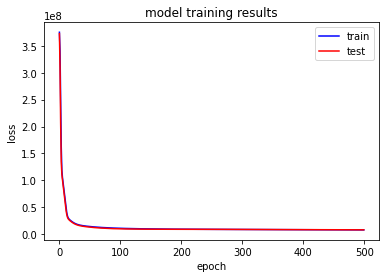

In [18]:
CarPrice_NN_base.plot_metrics("loss")

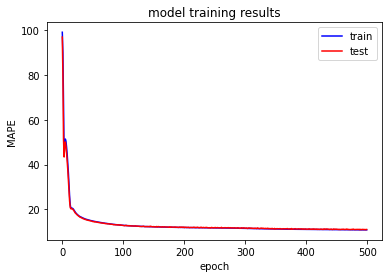

In [19]:
CarPrice_NN_base.plot_metrics("MAPE")

### Check price vs predicted value

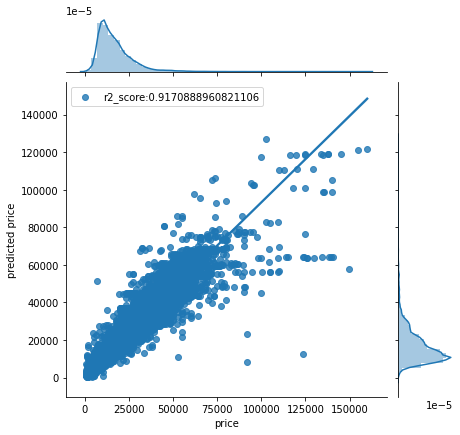

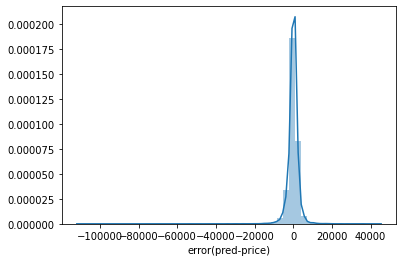

In [21]:
CarPrice_NN_base.plot_pred_price

In [22]:
price_table = CarPrice_NN_base.price_diff

In [23]:
price_table.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
20061,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1122.764878,1122.764878
39978,1,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1045.163236,1045.163236
39711,1,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,986.339034,986.339034
39336,1,5,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,919.146156,919.146156
11984,1,0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,804.556465,804.556465
71819,1,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,786.530805,786.530805
40172,1,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,637.409757,637.409757
69135,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,486.105613,486.105613
77582,1,4,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,439.304850,439.304850
40174,1,4,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,426.007587,426.007587


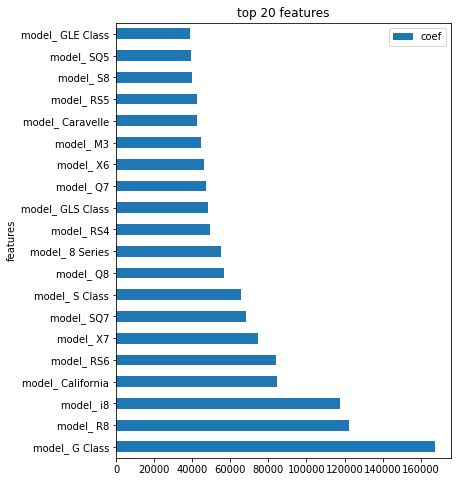

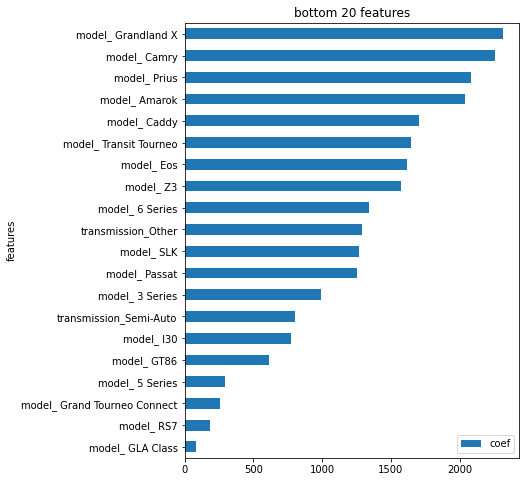

In [32]:
feature_table = CarPrice_NN_base.linear_feature_importance(plot=True)

### Pretty decent results and the error appear to be normal distribution

## Try a bigger model 

In [9]:
bigger_model = NNCarPrice.make_model([2056,2014,512,512],input_size,METRICS,1e-4,lr)

In [10]:
bigger_model.summary()

Model: "NN_regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2056)              425592    
_________________________________________________________________
dense_1 (Dense)              (None, 2014)              4142798   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1031680   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 5,863,239
Trainable params: 5,863,239
Non-trainable params: 0
_________________________________________________________________


In [11]:
CarPrice_NN_bigger = NNCarPrice(data,bigger_model,BATCH_SIZE,MAX_EPOCH,[EARLYSTOP])

In [20]:
CarPrice_NN_bigger.make_tensor_dataset(X_train,y_train,X_dev,y_dev)

In [31]:
CarPrice_NN_bigger.regression_metrics(X_train,y_train,X_test,y_test,False)

,r2_score,rmse,price_diff_abs_max
train,0.945249,2304.167576,773.200163
test,0.935161,2565.689448,237.532913


In [23]:
bigger_model_tuned = CarPrice_NN_bigger.trained_model

In [24]:
NNCarPrice.save_model(bigger_model_tuned,"bigger_model_nn.h5")

In [25]:
bigger_model_tuned = NNCarPrice.load_model("bigger_model_nn.h5")

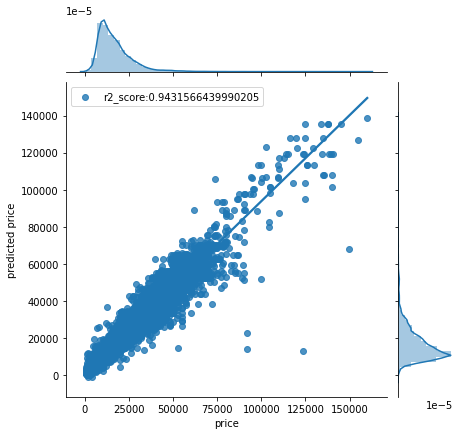

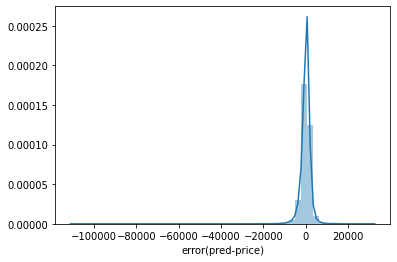

In [27]:
CarPrice_NN_bigger.plot_pred_price

### Pretty decent result and not over training the train data either

In [29]:
bigger_model_2 = NNCarPrice.make_model([2056,2014,512,512],input_size,METRICS,1e-4,5e-5)

In [30]:
bigger_model_2.summary()

Model: "NN_regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2056)              425592    
_________________________________________________________________
dense_9 (Dense)              (None, 2014)              4142798   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1031680   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 5,863,239
Trainable params: 5,863,239
Non-trainable params: 0
_________________________________________________________________


In [32]:
CarPrice_NN_bigger_2 = NNCarPrice(data,bigger_model_2,BATCH_SIZE,MAX_EPOCH,[EARLYSTOP])

In [34]:
CarPrice_NN_bigger_2.make_tensor_dataset(X_train,y_train,X_dev,y_dev)

In [38]:
CarPrice_NN_bigger_2.regression_metrics(X_train,y_train,X_test,y_test,False)

,r2_score,rmse,price_diff_abs_max
train,0.946719,2273.027782,810.000331
test,0.935837,2552.275710,239.792238


In [39]:
bigger_model_2 = CarPrice_NN_bigger_2.trained_model

In [40]:
NNCarPrice.save_model(bigger_model_2,"bigger_model_2.h5")

In [41]:
bigger_model_2 = NNCarPrice.load_model("bigger_model_2.h5")

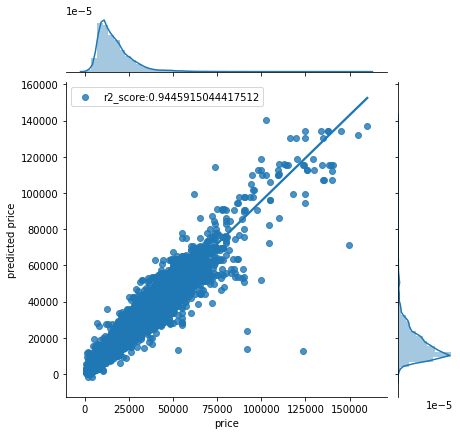

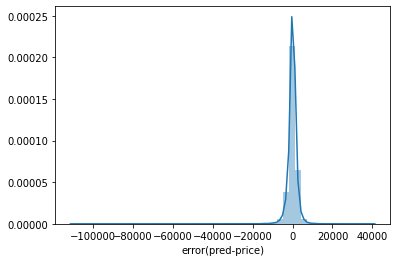

In [37]:
CarPrice_NN_bigger_2.plot_pred_price

### Since we have limited data, having bigger NN didn't seem to help with the improvement

------

### Looking at special cases of why the model has hard time predicting certain car price

In [42]:
price_table_final = CarPrice_NN_bigger_2.price_diff

In [43]:
price_table_final.head(20)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
11984,1,0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,810.000331,810.000331
39978,1,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,721.291617,721.291617
39711,1,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,720.170164,720.170164
71819,1,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,640.388715,640.388715
69135,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,412.248300,412.248300
77582,1,4,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,372.123617,372.123617
44539,1,4,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,344.024424,344.024424
39540,1,5,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,333.211789,333.211789
40171,1,4,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,329.283529,329.283529
71617,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,315.742567,315.742567


### Most of these models are older. The top cases have a weird combination of low car mileage but older year model 

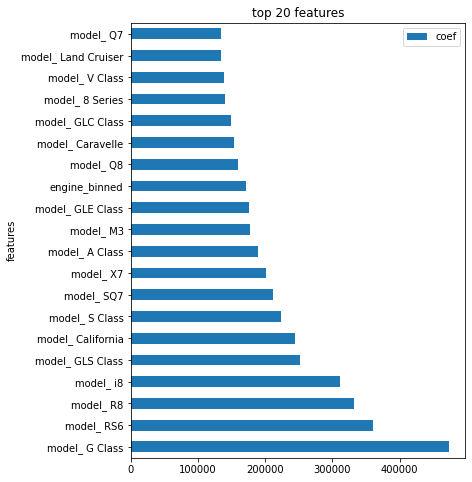

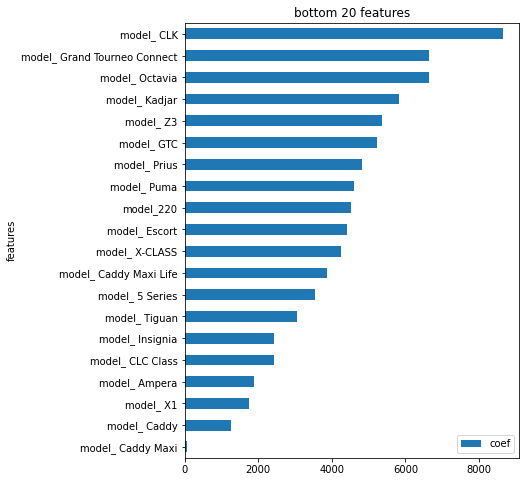

In [44]:
feature_table = CarPrice_NN_bigger_2.linear_feature_importance(plot=True)

### The NN models have mostly car model type as top and bottom features


____